Swaraj Andhale

21102A0011

CMPN A

[Github](https://github.com/swaraj150/ml_exps/blob/master/ml_exp_1.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('../Datasets/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
data.reset_index(inplace=True,drop=True)

In [9]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [10]:
le=LabelEncoder()
data['ocean_proximity']=le.fit_transform(data['ocean_proximity'])

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [12]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.289530
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.200801
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.112330
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.015363
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.069630
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.018251
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.014679
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.080488
ocean_proximity,-0.289530,0.200801,0.112330,-0.015363,-0.014768,-0.069630,-0.018251,-0.014679,0.080488,1.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

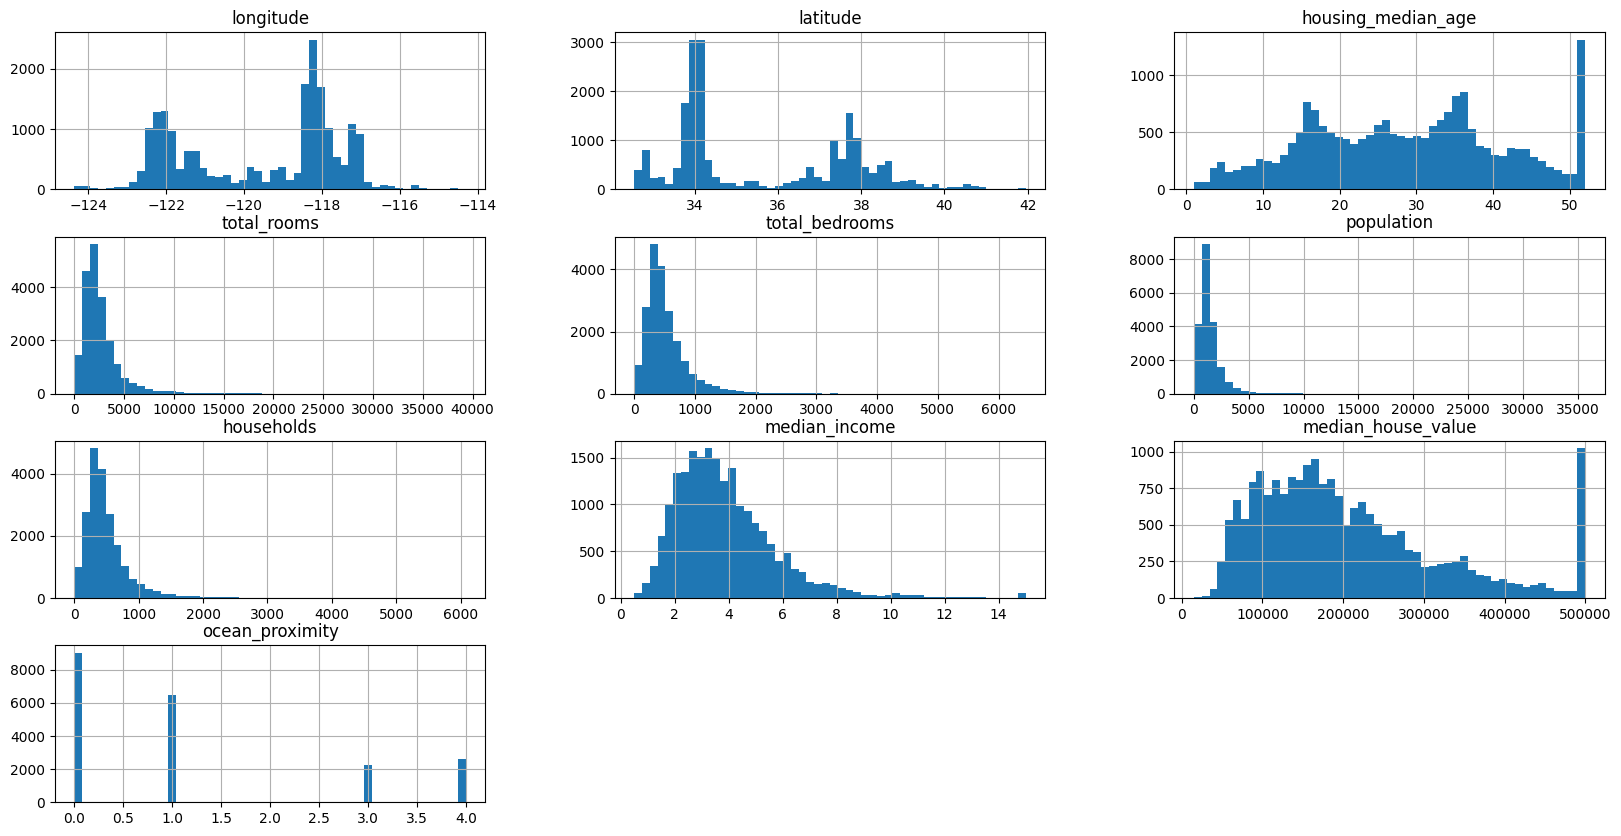

In [13]:
data.hist(bins=50,figsize=(20,10))

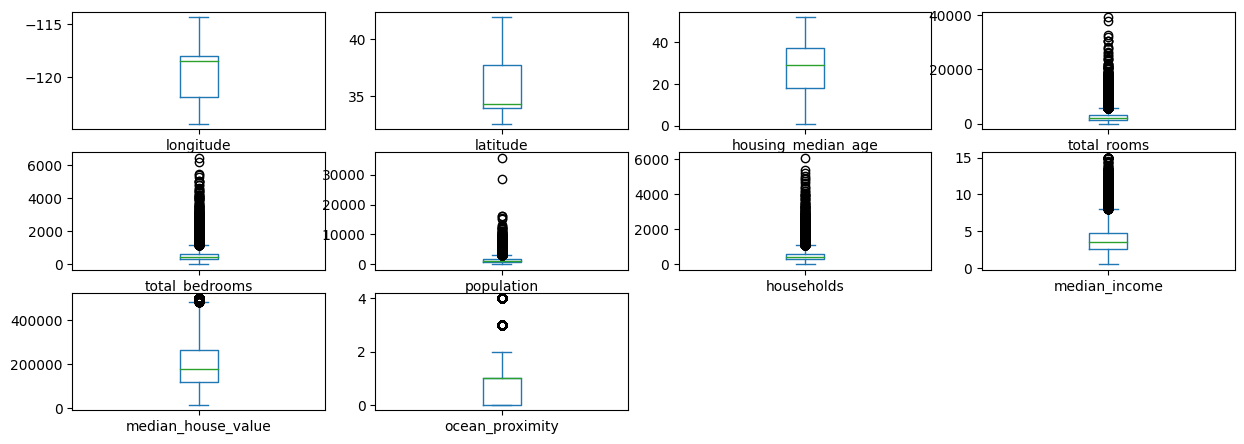

In [14]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

In [15]:
x=data.copy()

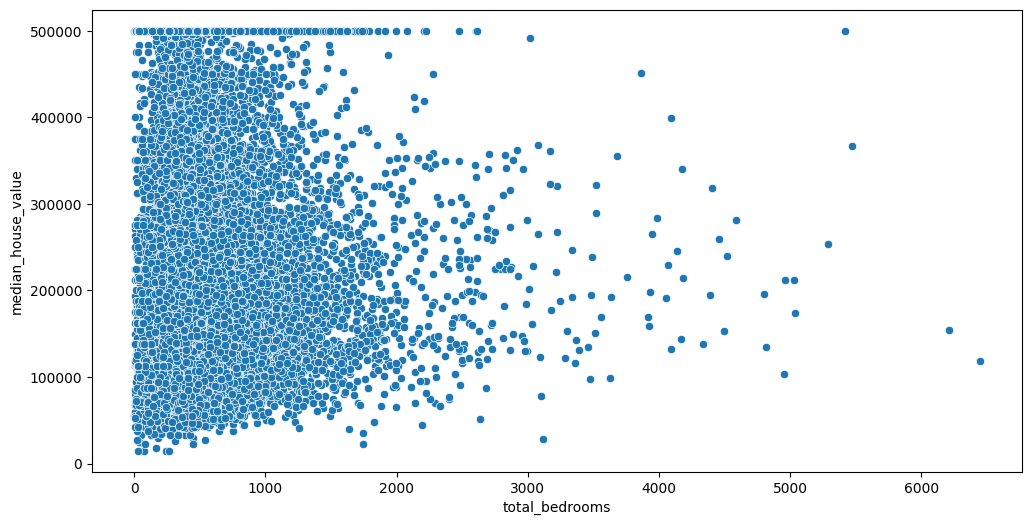

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=x['total_bedrooms'],y=x['median_house_value'])
x=x[x['total_bedrooms']<2800]

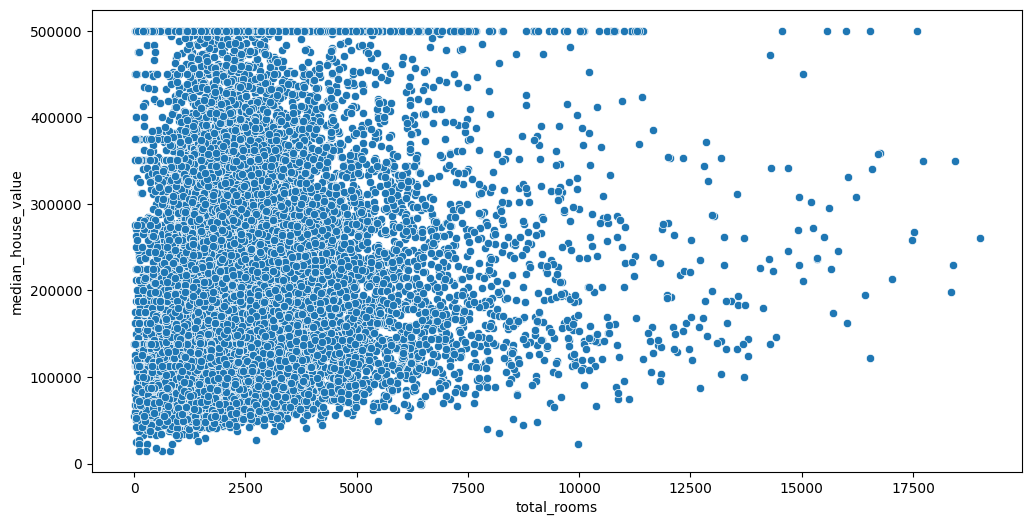

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=x['total_rooms'],y=x['median_house_value'])
x=x[x['total_rooms']<15000]

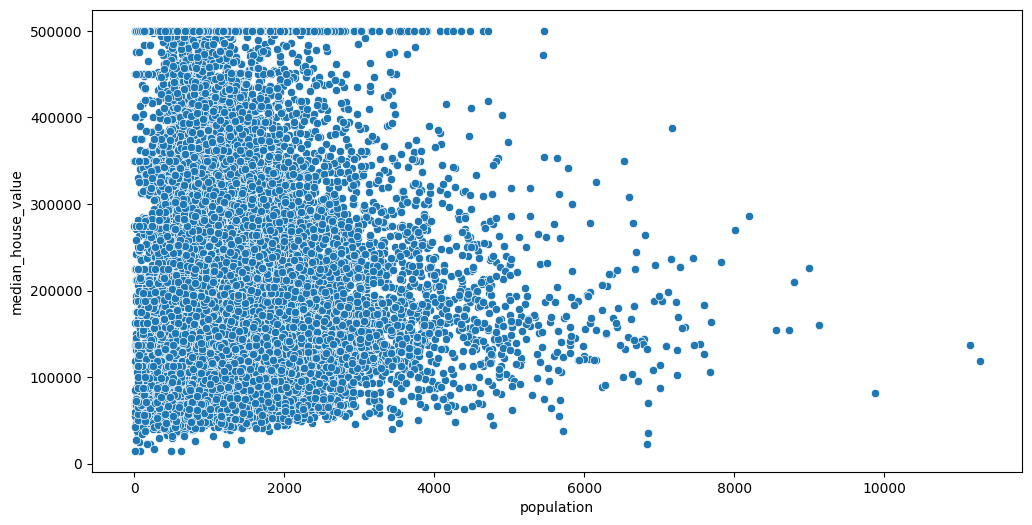

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=x['population'],y=x['median_house_value'])
x=x[x['population']<6500]

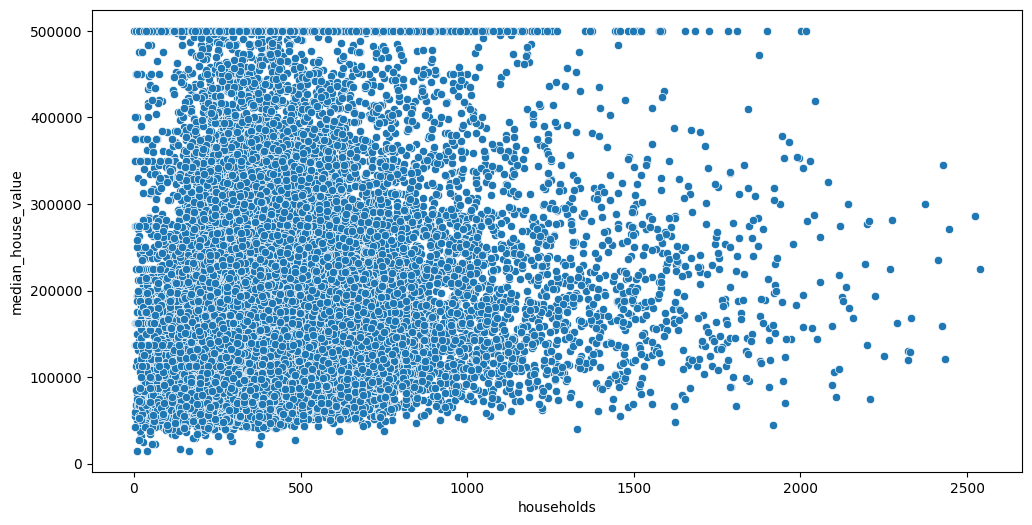

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=x['households'],y=x['median_house_value'])
x=x[x['households']<2000]

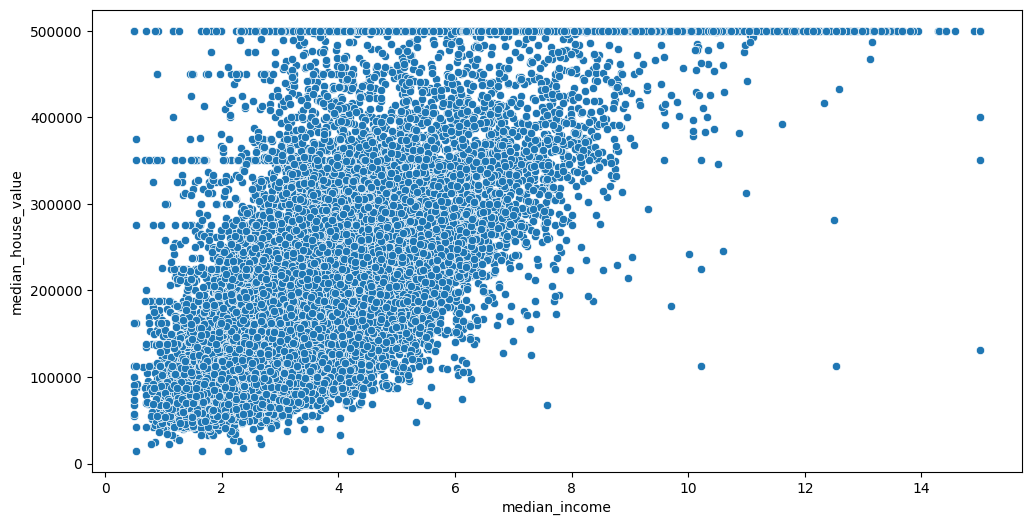

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=x['median_income'],y=x['median_house_value'])
x=x[x['median_income']<9]

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19805 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19805 non-null  float64
 1   latitude            19805 non-null  float64
 2   housing_median_age  19805 non-null  float64
 3   total_rooms         19805 non-null  float64
 4   total_bedrooms      19805 non-null  float64
 5   population          19805 non-null  float64
 6   households          19805 non-null  float64
 7   median_income       19805 non-null  float64
 8   median_house_value  19805 non-null  float64
 9   ocean_proximity     19805 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.6 MB


<Axes: >

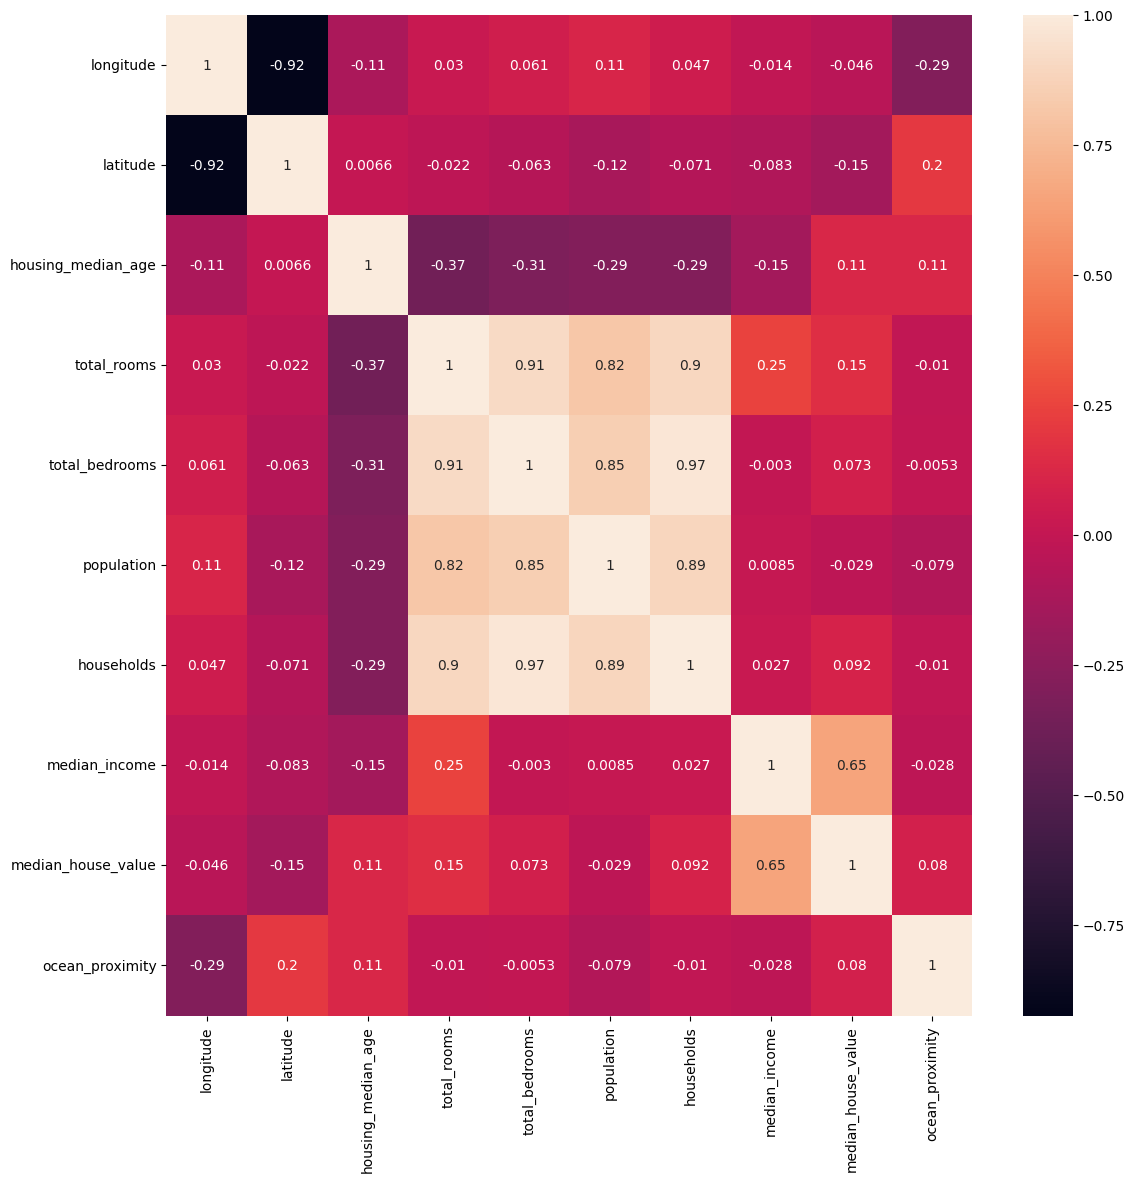

In [22]:
plt.figure(figsize=(13,13))
sns.heatmap(x.corr(),annot=True)

In [23]:
x_data = x.drop(["median_house_value"], axis = 1).values
y_data = x["median_house_value"].values

In [24]:
feature = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
x_data = feature.fit_transform(x_data)

In [25]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_data = scaler.fit_transform(x_data)

In [26]:
x_train, x_test, y_train , y_test = train_test_split(x_data,y_data, test_size=0.25 , random_state=42)

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
lr.score(x_train , y_train)

0.7392356114861235

In [30]:
lr.score(x_test , y_test)

0.7199506541754683

In [31]:
y_pred = lr.predict(x_test)

In [32]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})

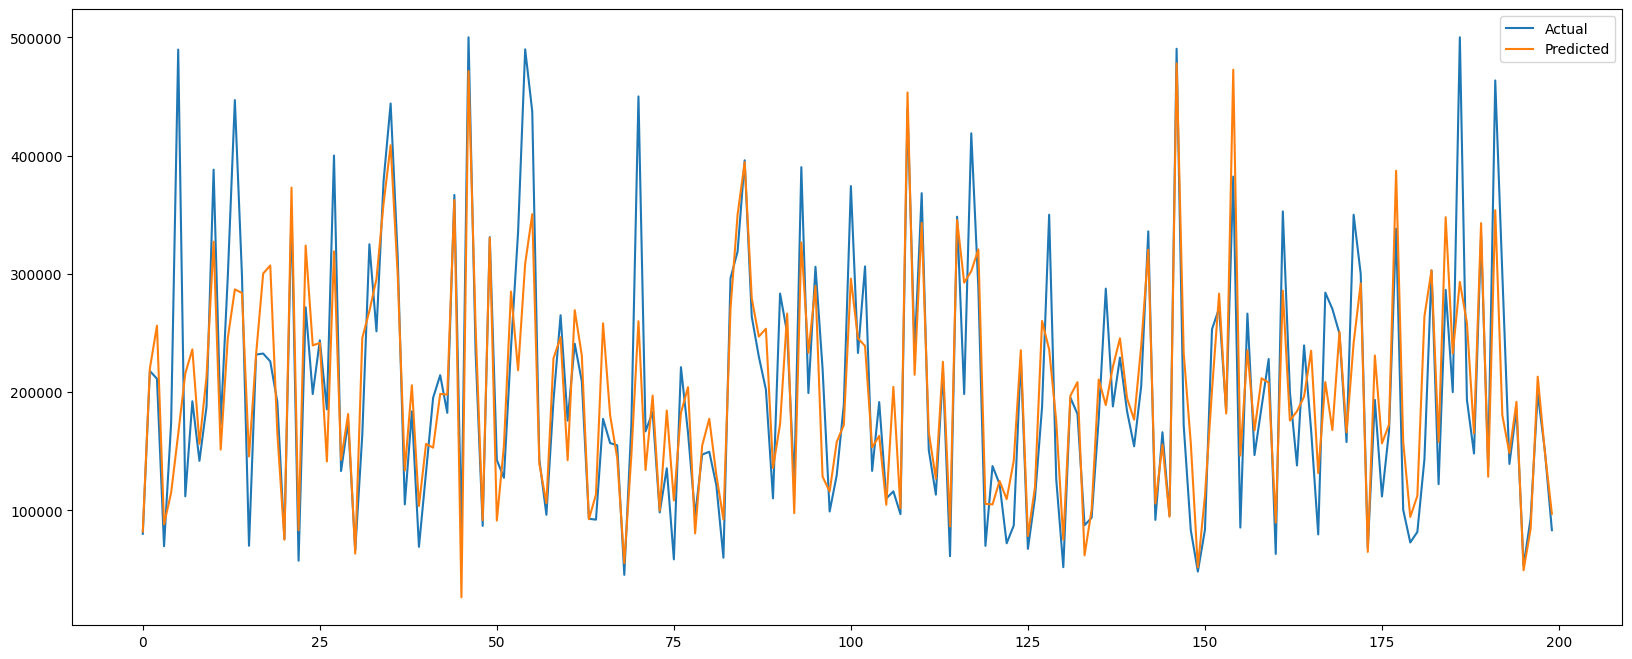

In [33]:
plt.figure(figsize=(20,8))
plt.plot(df[:200])
plt.legend(["Actual" , "Predicted"])

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3397195426.6495075
R^2 Score: 0.7199506541754683


In [35]:
input_features = pd.DataFrame({
    'longitude': [-121.09],
    'latitude': [39.48],
    'housing_median_age': [25.0],
    'total_rooms': [1665.0],
    'total_bedrooms': [374.0],
    'population': [845.0],
    'households': [330.0],
    'median_income': [1.5603],
    'ocean_proximity': [1]
})

In [36]:
input_data_poly = feature.transform(input_features)
input_data_scaled = scaler.transform(input_data_poly)
predicted_value = lr.predict(input_data_scaled)

c:\Users\andha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [37]:
print("Predicted Median House Value:", predicted_value[0])

Predicted Median House Value: 72727.93719208843
